In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
DATASET='50'

In [3]:
seq = get_standardized_measures(f'results/sequential_{DATASET}.csv')
seq_time_tot = seq['TOTAL'].mean()
seq_time_freq = seq['FREQCALC'].mean()

In [4]:
data = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [5]:
data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL
0,1,244682269,1328851647,711052,1574244968
1,1,226985910,1282951917,693990,1510631817
2,2,219600807,654140877,680695,874422379
3,2,226083551,649538697,677469,876299717
4,3,219839334,439322730,701133,659863197
...,...,...,...,...,...
75,38,218876621,87878254,727463,307482338
76,39,221610622,93480628,764823,315856073
77,39,248540006,95714383,747320,345001709
78,40,255517807,93181518,728544,349427869


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

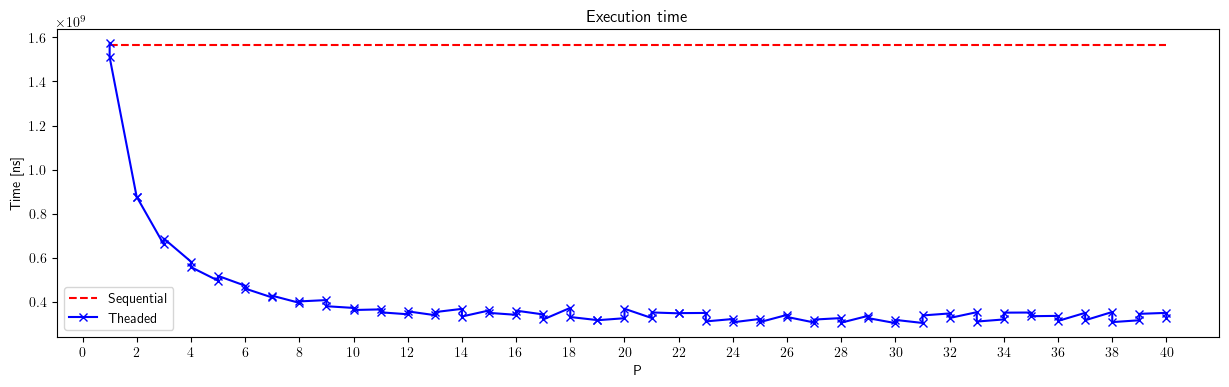

In [7]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [8]:
import pandas as pd

In [9]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).median()

In [10]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL
0,1,235834089.5,1.305902e+09,702521.0,1.542438e+09
1,2,222842179.0,6.518398e+08,679082.0,8.753610e+08
2,3,232637071.5,4.399567e+08,697186.0,6.732909e+08
3,4,237800103.0,3.312420e+08,700863.0,5.697429e+08
4,5,237668711.5,2.682255e+08,687849.0,5.065821e+08
5,6,238607455.0,2.269459e+08,679583.0,4.662329e+08
6,7,222302638.0,2.002561e+08,679748.0,4.232384e+08
7,8,222561558.0,1.749719e+08,685839.5,3.982193e+08
8,9,233722840.0,1.590772e+08,726506.0,3.935265e+08
9,10,222764187.0,1.436937e+08,703898.0,3.671618e+08


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [11]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [12]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL,S_p
0,1,235834089.5,1.305902e+09,702521.0,1.542438e+09,1.015399
1,2,222842179.0,6.518398e+08,679082.0,8.753610e+08,1.789193
2,3,232637071.5,4.399567e+08,697186.0,6.732909e+08,2.326171
3,4,237800103.0,3.312420e+08,700863.0,5.697429e+08,2.748941
4,5,237668711.5,2.682255e+08,687849.0,5.065821e+08,3.091680
5,6,238607455.0,2.269459e+08,679583.0,4.662329e+08,3.359243
6,7,222302638.0,2.002561e+08,679748.0,4.232384e+08,3.700490
7,8,222561558.0,1.749719e+08,685839.5,3.982193e+08,3.932983
8,9,233722840.0,1.590772e+08,726506.0,3.935265e+08,3.979884
9,10,222764187.0,1.436937e+08,703898.0,3.671618e+08,4.265666


In [13]:
max_speedup = sp_data[sp_data['S_p'].max() == sp_data['S_p']]

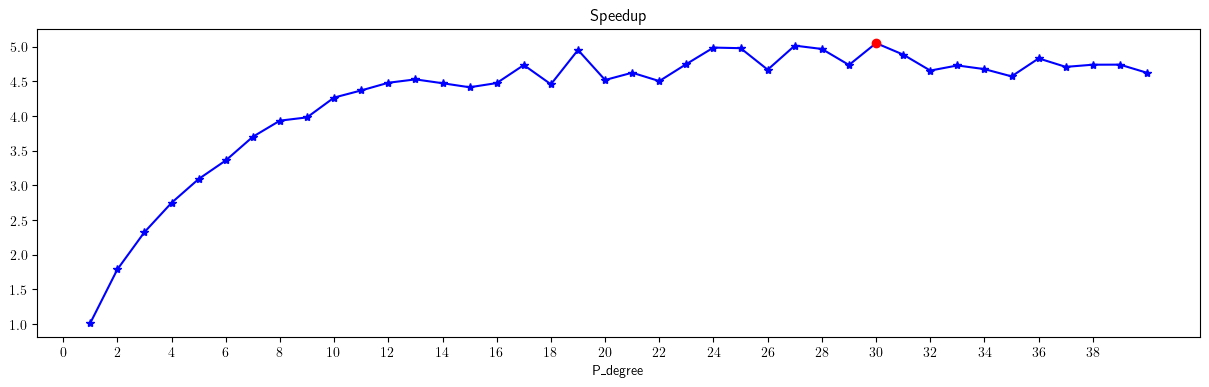

In [14]:
# plot results
plt.figure(figsize=(15,4))
plt.title("Speedup")
plt.xlabel('P_{degree}')
plt.xticks(range(0, len(sp_data), 2))
plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], '*-b')
plt.plot(max_speedup['P_DEGREE'],max_speedup['S_p'], 'or')

### Max Speedup

Max speedup reached

In [15]:
max_speedup

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL,S_p
29,30,224064483.5,85406002.5,668537.5,310139023.5,5.04996


# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [16]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    1.542438e+09
Name: TOTAL, dtype: float64

In [17]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


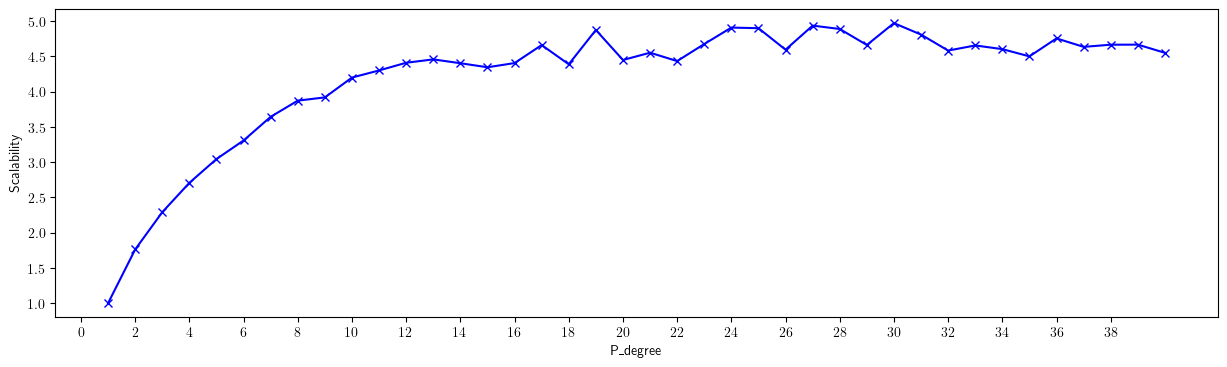

In [18]:
# plot results
plt.figure(figsize=(15,4))
plt.xticks(range(0, len(sp_data), 2))
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')